============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.008870530279409495
X= (1, 0)
result =  0.15286609727858397
X= (0, 1)
result =  0.1514678641804975
X= (1, 1)
result =  0.7825654550021459
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.001318574845238245
X= (1, 0)
result =  0.08808213297294183
X= (0, 1)
result =  0.08805462011658945
X= (1, 1)
result =  0.875988790203955
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.00046532935483566
X= (1, 0)
result =  0.06415503327603911
X= (0, 1)
result =  0.06417548207696573
X= (1, 1)
result =  0.909894352710216
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.00019743656093404137
X= (1, 0)
result =  0.04912099508063435
X= (0, 1)
result =  0.049123147246028384
X= (1, 1)
result =  0.9311019748536781
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.00010256522987391724
X= (1, 0)
result =  0.03993142480327093
X= (0, 1)
result =  0.039931

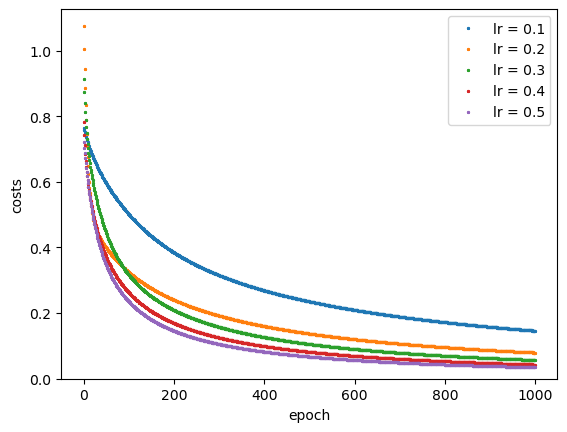

============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.1844430451682668
X= (1, 0)
result =  0.9331959696530018
X= (0, 1)
result =  0.9237109794464223
X= (1, 1)
result =  0.9986646859311514
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.10110087390560069
X= (1, 0)
result =  0.9614962105746939
X= (0, 1)
result =  0.9585518191607464
X= (1, 1)
result =  0.9998052824244945
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.06697324658320157
X= (1, 0)
result =  0.973307118779011
X= (0, 1)
result =  0.9734489621360948
X= (1, 1)
result =  0.9999463094556638
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.05148561904096133
X= (1, 0)
result =  0.9795018555547957
X= (0, 1)
result =  0.9794930803721075
X= (1, 1)
result =  0.9999762184567448
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.041983181200218433
X= (1, 0)
result =  0.9832906076825003
X= (0, 1)
result =  0.9832392687990846
X= (1

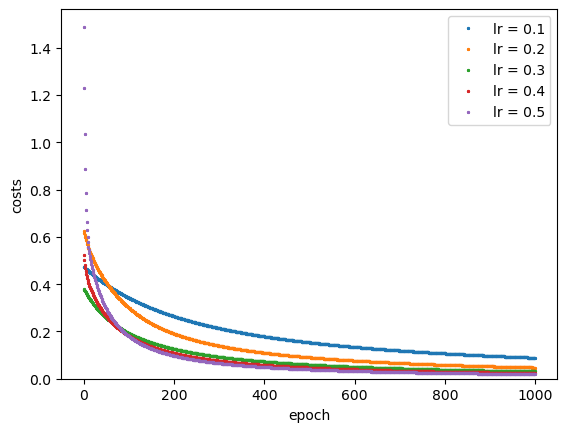

============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.4987772955691956
X= (1, 0)
result =  0.49905821491228636
X= (0, 1)
result =  0.5005580271044504
X= (1, 1)
result =  0.5008389472154315
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.4999728044921014
X= (1, 0)
result =  0.49999513669120194
X= (0, 1)
result =  0.4999963277446712
X= (1, 1)
result =  0.5000186599437897
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.5000005236996127
X= (1, 0)
result =  0.5000000836486711
X= (0, 1)
result =  0.5000000807193429
X= (1, 1)
result =  0.4999996406684013
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.49999997563016446
X= (1, 0)
result =  0.4999999961768146
X= (0, 1)
result =  0.49999999617448504
X= (1, 1)
result =  0.5000000167211351
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.5000000000168351
X= (1, 0)
result =  0.500000000002644
X= (0, 1)
result =  0.5000000000026398
X= (1,

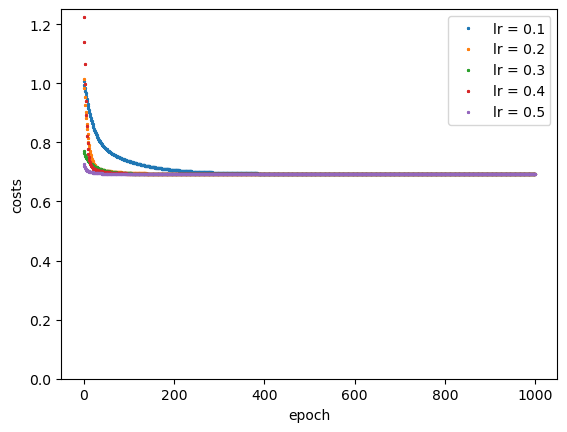

In [69]:
from math import exp, log
import matplotlib.pyplot as plt
import numpy as np


class logisitic_regression_model():
    def __init__(self, X, Y):
        self.w = np.random.normal(size=len(X[0]))
        self.b = np.random.random_sample()
        self.X = X
        self.Y = Y

    def sigmoid(self, z):
        return 1 / (1 + exp(-z))

    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

    def train(self, lr=0.1):
        dw = np.array([0.0 for _ in range(len(self.X[0]))])
        db = 0.0
        m = len(self.X)
        cost = 0.0
        for x, y in zip(self.X, self.Y):
            a = self.predict(x)
            if y == 1:
                cost -= log(a)
            else:
                cost -= log(1 - a)
            dw += (a - y) * np.asarray(x)
            db += (a - y)
        cost /= m
        self.w -= lr * dw / m
        self.b -= lr * db / m
        return cost


X = [(0, 0), (1, 0), (0, 1), (1, 1)]
Ys = [
    [0, 0, 0, 1],  # AND
    [0, 1, 1, 1],  # OR
    [0, 1, 1, 0],  # XOR
]
lrs = [round(0.1 + i * 0.1, 1) for i in range(5)]

for Y in Ys:
    plt.figure()
    for lr in lrs:
        epochs = []
        costs = []
        model = logisitic_regression_model(X, Y)
        for epoch in range(1000):
            cost = model.train(lr)
            epochs.append(epoch)
            costs.append(cost)
        plt.plot(epochs, costs, '*', label='lr = {}'.format(lr), markersize=2)
        print("============ Prediction for lr = {} ============".format(lr))
        for x in X:
            print('X= {}'.format(x))
            print('result = ', model.predict(x))
    plt.legend()
    plt.ylim(0)
    plt.xlabel('epoch')
    plt.ylabel('costs')
    plt.show()


